mu (%): 0    1.0
1    2.0
2    2.5
3    3.0
4    3.5
5    4.0
6    5.0
7    5.5
dtype: float64
 
Recovery (%): 0    30.0
1    30.0
2    30.0
3    30.0
4    30.0
5    30.0
6    30.0
7    30.0
dtype: float64
 
lambda (%): 0     5.0
1    10.0
2    15.0
3    25.0
4    25.0
5    40.0
6    50.0
7    70.0
dtype: float64
 
{'Expected loss (%)': 11.88, 'Yield (%)': 2.45, 'Diversification (%)': 70.0}


[Text(0.5, 0, 'weight (%)'), Text(0, 0.5, 'vault')]

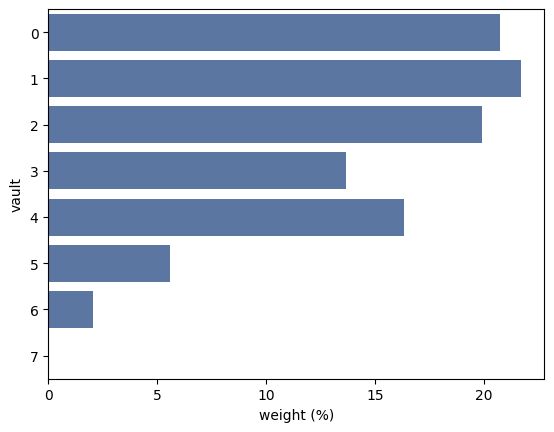

In [1]:
from portfolio_optimization.optimization.GeneralOptimization import (
    GeneralOptimizationDelegate,
)
from portfolio_optimization.optimization.vault_allocation import VaultAllocation
import numpy as np
import pandas as pd
import seaborn as sns

# Yields
mu = pd.Series(
    [1 / 100, 2 / 100, 2.5 / 100, 3 / 100, 3.5 / 100, 4 / 100, 5 / 100, 5.5 / 100]
)

print("mu (%):", np.round(mu * 100, 2))
print(" ")

# vector of recovery rates
R = pd.Series(
    [30 / 100, 30 / 100, 30 / 100, 30 / 100, 30 / 100, 30 / 100, 30 / 100, 30 / 100]
)


print("Recovery (%):", np.round(R * 100, 2))
print(" ")

# vector of probability of default
lmb = pd.Series(
    [5 / 100, 10 / 100, 15 / 100, 25 / 100, 25 / 100, 40 / 100, 50 / 100, 70 / 100]
)

print("lambda (%):", np.round(lmb * 100, 2))
print(" ")

# The parameter omega represents the risk aversion of the strategy and ranges from 0% to 100%
# An allocation achieved at 100% would suit a risk-averse investor,
# whereas one achieved at 0% would primarily focus on maximizing yield.
omega = 60 / 100

# EPSILON_RANGE = 1/100/100 (to avoid numerical issues at the boundaries)
# The diversification factor D ranges from 1/n% * (1 + EPSILON_RANGE) to 100% * (1 - EPSILON_RANGE)
D = 70 / 100


portfolio = VaultAllocation(
    df=pd.DataFrame(),
    mcaps=None,
    asset_weight_bounds={"*": (0, 1)}
)


class CustomVaultAllocationDelegate(GeneralOptimizationDelegate):

    def setup(self, optimization_object: VaultAllocation):
        optimization_object.yield_data = mu
        optimization_object.recovery_rate = R
        optimization_object.default_risk = lmb
        optimization_object.risk = omega
        optimization_object.diversification = D
        return super().setup(optimization_object)


portfolio.delegate = CustomVaultAllocationDelegate()

pf = portfolio.get_weights()

print(portfolio.get_metrics())

portfolio_plot = np.reshape(pf, [-1, 1])
portfolio_plot = pd.DataFrame(portfolio_plot, columns=np.array(["w"]))
portfolio_plot.index = np.arange(0, len(mu.index))

portfolio_plot["w"] = np.round(pf * 100, 2)
portfolio_plot["mu"] = np.round(mu * 100, 2)

ax = sns.barplot(
    x="w", y=portfolio_plot.index, data=portfolio_plot, orient="h", saturation=0.7
)

ax.set(xlabel="weight (%)", ylabel="vault")